## NLP Assigment: Spam detection 

In [2]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score


In [3]:
df = pd.read_csv("data/emails.csv")
df.shape

(5172, 3002)

In [4]:
print(df.head(5))
print(df.info())

  Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  jay  \
0   Email 1    0   0    1    0    0   0    2    0    0  ...         0    0   
1   Email 2    8  13   24    6    6   2  102    1   27  ...         0    0   
2   Email 3    0   0    1    0    0   0    8    0    0  ...         0    0   
3   Email 4    0   5   22    0    5   1   51    2   10  ...         0    0   
4   Email 5    7   6   17    1    5   2   57    0    9  ...         0    0   

   valued  lay  infrastructure  military  allowing  ff  dry  Prediction  
0       0    0               0         0         0   0    0           0  
1       0    0               0         0         0   1    0           0  
2       0    0               0         0         0   0    0           0  
3       0    0               0         0         0   0    0           0  
4       0    0               0         0         0   1    0           0  

[5 rows x 3002 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries

29.00%


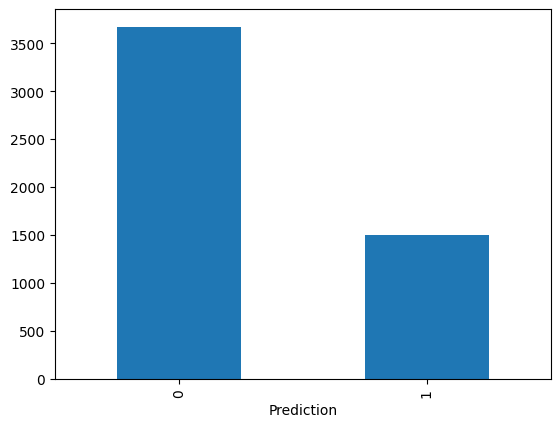

In [5]:
df['Prediction'].value_counts().plot.bar()
print(f"{(len(df[df['Prediction'] == 1]) / len(df['Prediction'])) * 100:.2f}%")

Il dataset non è sbilanciato

In [6]:
# La funzione spamDetector è progettata per classificare messaggi come spam o non spam utilizzando 
# il modello Naive Bayes Multinomial. 
def spamDetector(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    model = MultinomialNB()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred))
    
    return y_test,y_pred


##### Multinomial Naive Bayes with All Features
I evaluate the performance of a Multinomial Naive Bayes classifier using all the features available in the dataset.

In [7]:
X = df.drop(columns=['Email No.','Prediction'])
y = df['Prediction']

y_test,y_pred = spamDetector(X,y)
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       735
           1       0.87      0.94      0.90       300

    accuracy                           0.94      1035
   macro avg       0.92      0.94      0.93      1035
weighted avg       0.94      0.94      0.94      1035

F1 Score: 0.90


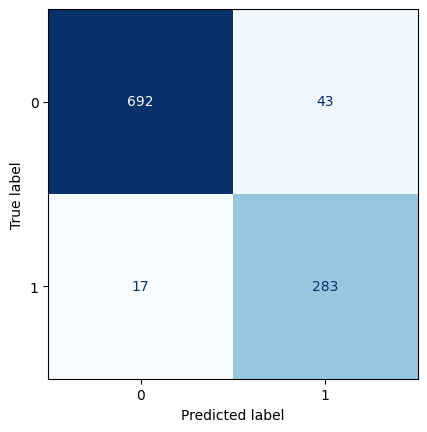

In [8]:
cm1 = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm1, display_labels=[0, 1]).plot(cmap='Blues', colorbar=False)

plt.show()

##### Multinomial Naive Bayes without stopwords
I evaluate the performance of a Multinomial Naive Bayes classifier without .

In [9]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rikyf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
df = pd.read_csv("data/emails.csv")

In [11]:
stop_words = set(stopwords.words('english'))
drop_f = []
for feature in df.columns:
    if feature in stop_words:
        drop_f.append(feature)
print(drop_f)

['the', 'to', 'and', 'for', 'of', 'a', 'you', 'in', 'on', 'is', 'this', 'i', 'be', 'that', 'will', 'have', 'with', 'your', 'at', 'we', 's', 'are', 'it', 'by', 'as', 'from', 'or', 'not', 'me', 'if', 're', 'any', 'our', 'can', 'd', 'all', 'has', 'was', 'an', 't', 'up', 'should', 'do', 'am', 'out', 'no', 'there', 'but', 'been', 'these', 'so', 'm', 'into', 'they', 'my', 'what', 'only', 'which', 'more', 'about', 'now', 'their', 'some', 'just', 'other', 'here', 'when', 'over', 'them', 'below', 'o', 'he', 'were', 'who', 'don', 'its', 'through', 'had', 'she', 'how', 'being', 'under', 'than', 'off', 'after', 'each', 'll', 'did', 'before', 'then', 'his', 'same', 'does', 'above', 'those', 'down', 'very', 'her', 'such', 'again', 'both', 've', 'until', 'because', 'where', 'further', 'most', 'between', 'own', 'once', 'while', 'during', 'why', 'him', 'few', 'y', 'too', 'having', 'doing', 'didn', 'yourself', 'doesn', 'won', 'against', 'nor', 'myself', 'isn', 'haven', 'whom', 'couldn', 'wasn', 'itself'

In [12]:
df_filtered = df.drop(drop_f, axis=1)
df_filtered

,Email No.,ect,hou,enron,com,gas,deal,meter,hpl,please,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,24,27,1,3,1,0,0,0,2,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,1,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,22,10,0,0,0,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,17,9,0,0,2,0,3,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,11,3,1,3,5,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,1,0,0,4,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,1


In [13]:
X = df_filtered.drop(columns=['Email No.','Prediction'])
y = df_filtered['Prediction']

y_test,y_pred = spamDetector(X,y)

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       735
           1       0.87      0.94      0.90       300

    accuracy                           0.94      1035
   macro avg       0.92      0.94      0.93      1035
weighted avg       0.94      0.94      0.94      1035



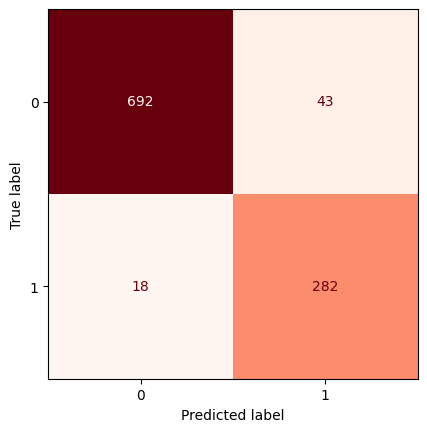

In [14]:
cm2 = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm2, display_labels=[0, 1]).plot(cmap='Reds', colorbar=False)

plt.show()

### Determination of the field Provenance
We can leverage email similarity metrics to determine the Provenance field of an email dataset. The goal is to group emails based on their content.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(df_filtered.drop(columns=['Email No.', 'Prediction']))

from sim in similarity_matrix:

array([[1.        , 0.79022157, 0.30173535, ..., 0.60065324, 0.70357741,
        0.69730411],
       [0.79022157, 1.        , 0.50619934, ..., 0.80444644, 0.88385949,
        0.92934789],
       [0.30173535, 0.50619934, 1.        , ..., 0.57866805, 0.54309383,
        0.58403374],
       ...,
       [0.60065324, 0.80444644, 0.57866805, ..., 1.        , 0.79340439,
        0.86811332],
       [0.70357741, 0.88385949, 0.54309383, ..., 0.79340439, 1.        ,
        0.91580254],
       [0.69730411, 0.92934789, 0.58403374, ..., 0.86811332, 0.91580254,
        1.        ]])